<a href="https://colab.research.google.com/github/KrishChothani/AI_ML/blob/main/ML_PRACT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv(r'Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
x = data['area'].values
y = data['price'].values

In [4]:
n = len(x)
n

545

Learning rate 1e-05: Stopped due to max iterations.

Learning Rate: 1e-05
Converged in 1000 iterations
Final equation: price = 0.39 * area + 0.11


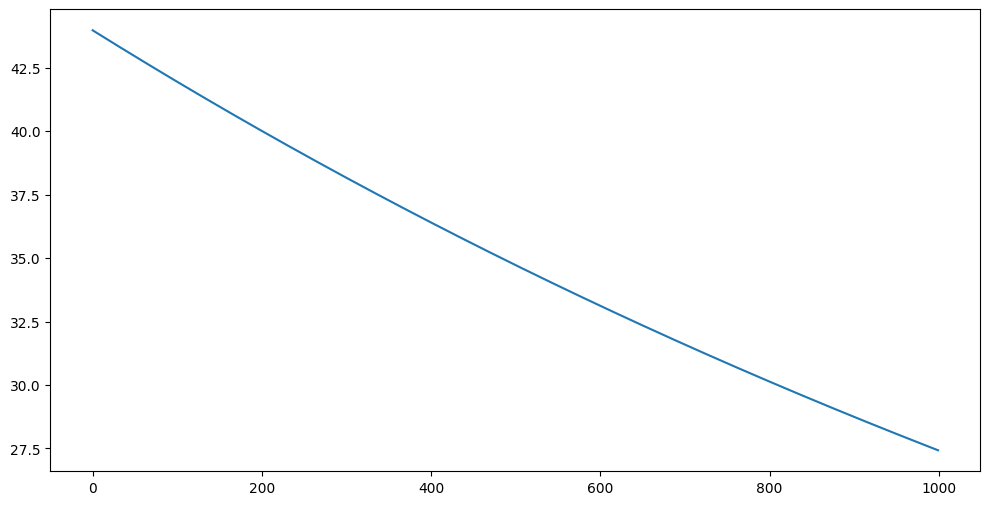

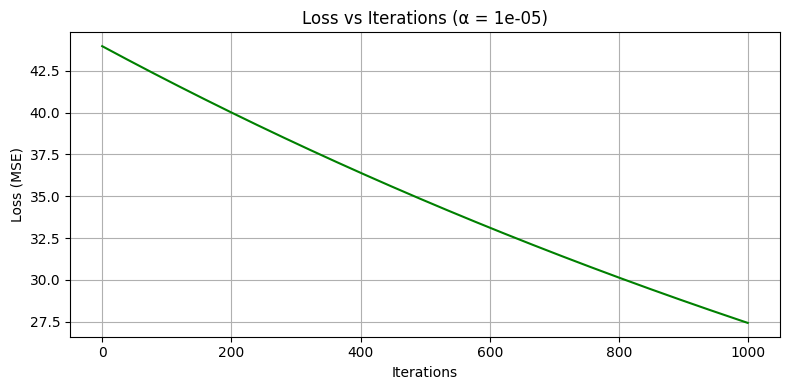

Learning rate 3e-06: Stopped due to max iterations.

Learning Rate: 3e-06
Converged in 1000 iterations
Final equation: price = 0.13 * area + 0.03


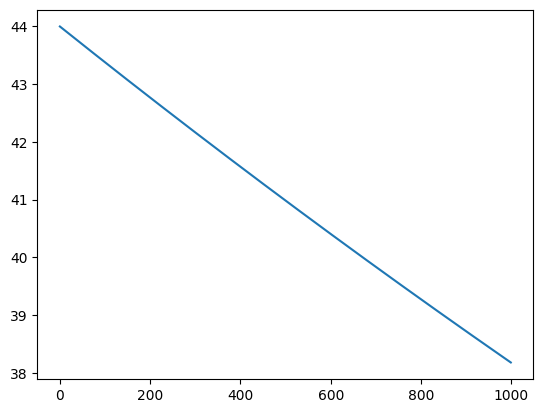

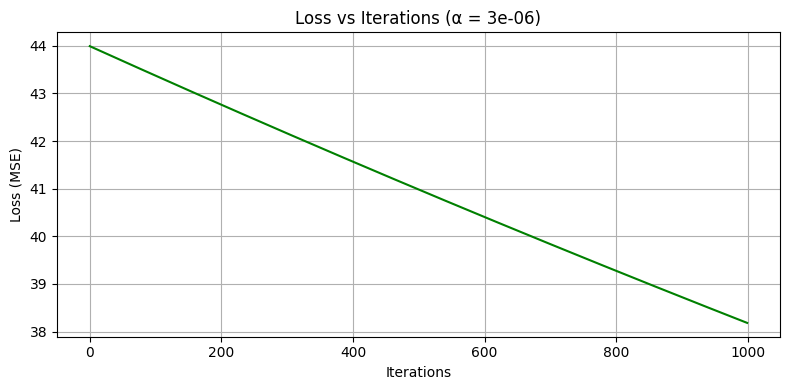

Learning rate 0.0005: Stopped due to max iterations.

Learning Rate: 0.0005
Converged in 1000 iterations
Final equation: price = 1.88 * area + 0.43


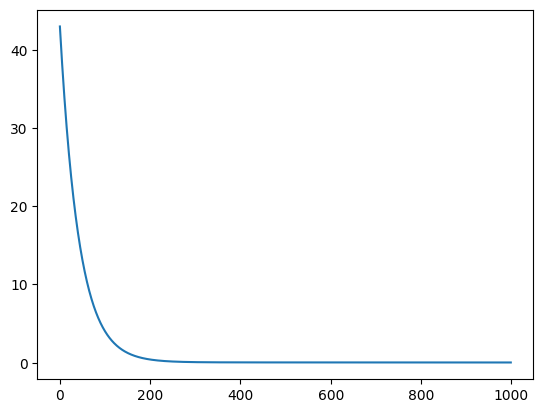

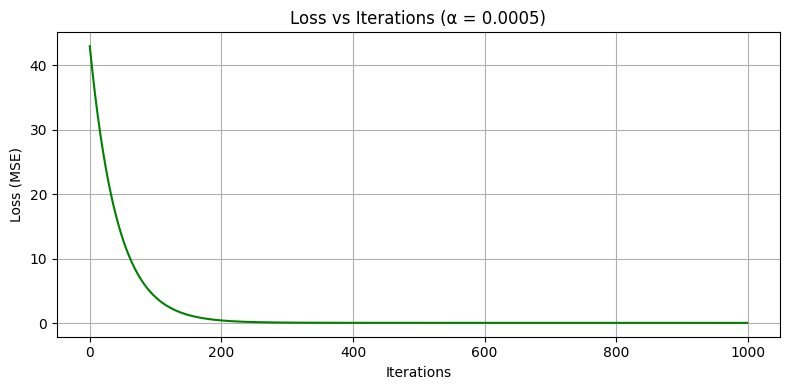

Learning rate 7e-06: Stopped due to max iterations.

Learning Rate: 7e-06
Converged in 1000 iterations
Final equation: price = 0.28 * area + 0.08


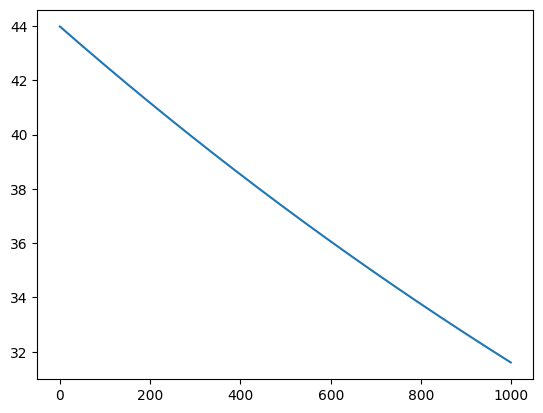

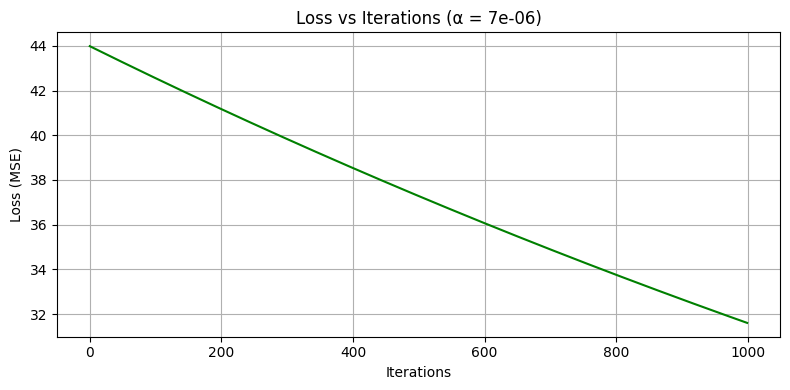

Learning rate 1e-05: Stopped due to max iterations.

Learning Rate: 1e-05
Converged in 1000 iterations
Final equation: price = 0.39 * area + 0.11


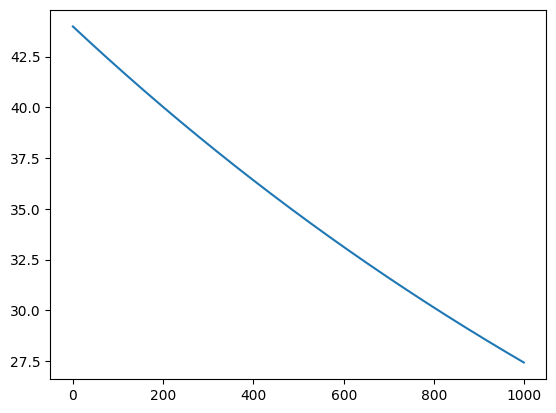

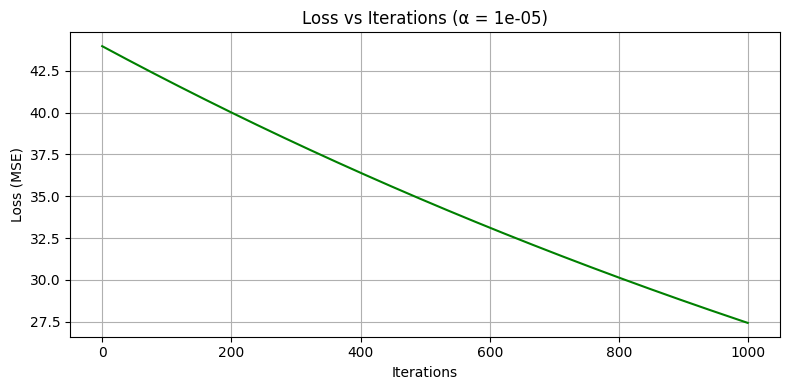

/tmp/ipython-input-3585833156.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


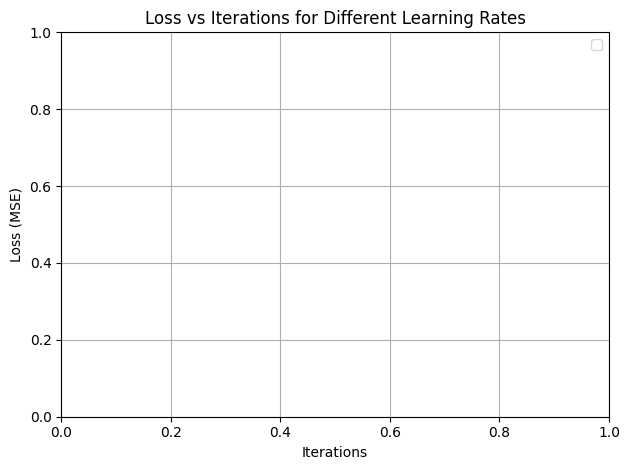

In [6]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

learning_rates = [0.00001, 0.000003, 0.0005, 0.000007, 0.00001]

plt.figure(figsize=(12, 6))
for alpha in learning_rates:
    m = 0
    b = 0
    n = len(x)
    threshold = 0.00001
    prev_loss = float('inf')
    max_iterations = 1000
    iteration = 0
    losses = []

    while True:
        dm = 0
        db = 0
        for i in range(n):
            y_pred = m * x[i] + b
            error = y_pred - y[i]
            dm += error * x[i]
            db += error

        dm = (2 / n) * dm
        db = (2 / n) * db

        m = m - alpha * dm
        b = b - alpha * db

        loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
        losses.append(loss)

        if abs(prev_loss - loss) < threshold:
            break

        prev_loss = loss
        iteration += 1
        if iteration >= max_iterations:
            print(f"Learning rate {alpha}: Stopped due to max iterations.")
            break

    # Plot on the combined graph
    plt.plot(range(len(losses)), losses, label=f"α = {alpha}")

    # Print result
    print(f"\nLearning Rate: {alpha}")
    print(f"Converged in {iteration} iterations")
    print(f"Final equation: price = {m:.2f} * area + {b:.2f}")

    # Plot individual graph
    plt_individual = plt.figure(figsize=(8, 4))
    plt.plot(range(len(losses)), losses, color='green')
    plt.title(f"Loss vs Iterations (α = {alpha})")
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Combined loss graph
plt.title("Loss vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


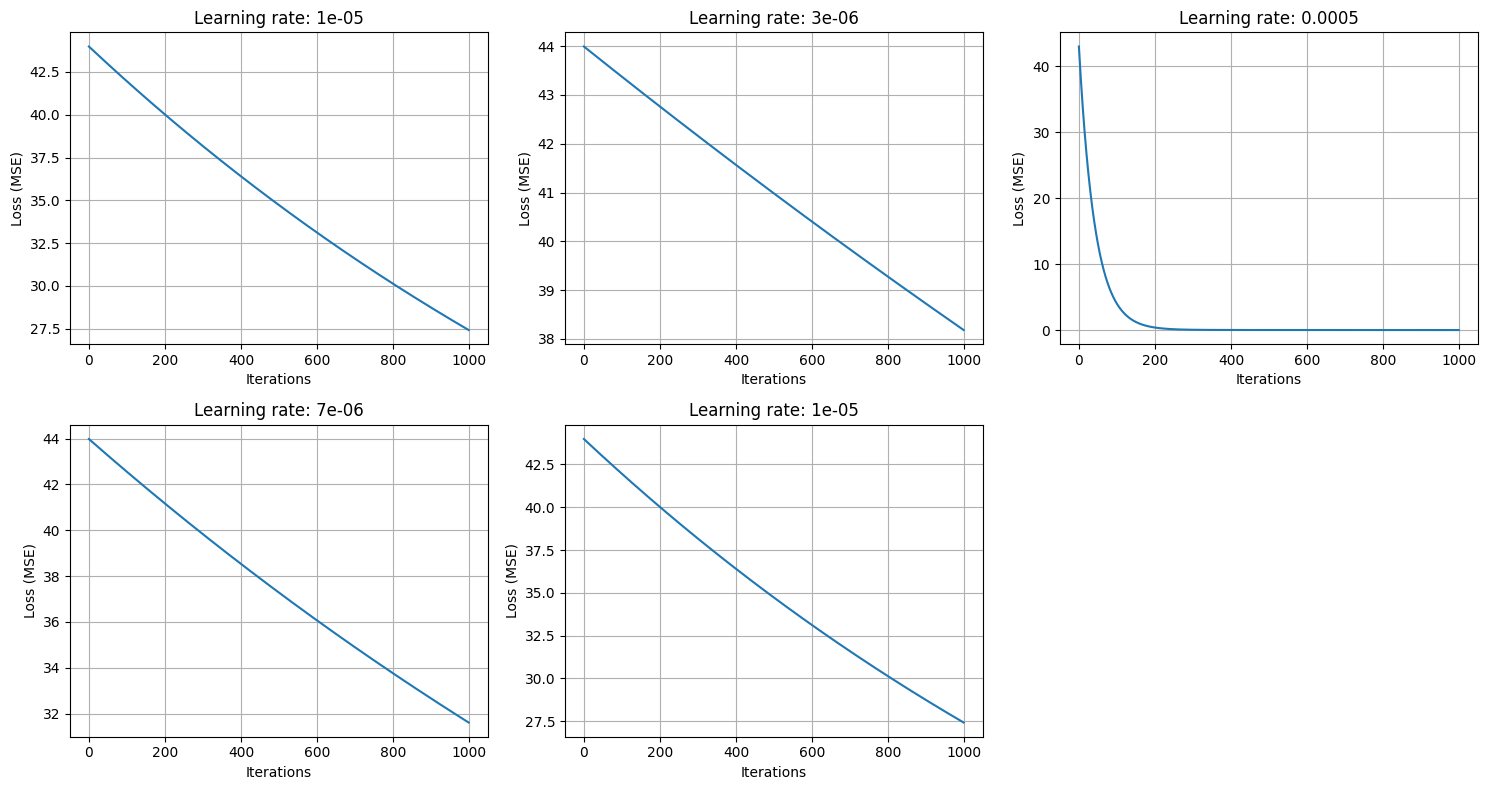

In [8]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

learning_rates = [0.00001, 0.000003, 0.0005, 0.000007, 0.00001]
max_iterations = 1000

losses_dict = {}

for alpha in learning_rates:
    m = 0
    b = 0
    n = len(x)
    losses = []

    for iteration in range(max_iterations):
        dm = 0
        db = 0
        for i in range(n):
            y_pred = m * x[i] + b
            error = y_pred - y[i]
            dm += error * x[i]
            db += error

        dm = (2 / n) * dm
        db = (2 / n) * db

        m = m - alpha * dm
        b = b - alpha * db

        loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
        losses.append(loss)

    losses_dict[alpha] = losses

# Arrange plots in a 2x3 grid (as you have 5 learning rates)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, alpha in enumerate(learning_rates):
    axs[i].plot(range(max_iterations), losses_dict[alpha])
    axs[i].set_title(f"Learning rate: {alpha}")
    axs[i].set_xlabel("Iterations")
    axs[i].set_ylabel("Loss (MSE)")
    axs[i].grid(True)

# Remove empty subplot if any
if len(learning_rates) < len(axs):
    for j in range(len(learning_rates), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Learning rate 1e-05: Stopped due to max iterations.

Learning Rate: 1e-05
Converged in 1000 iterations
Final equation: price = 0.39 * area + 0.11
Learning rate 3e-06: Stopped due to max iterations.

Learning Rate: 3e-06
Converged in 1000 iterations
Final equation: price = 0.13 * area + 0.03
Learning rate 0.0005: Stopped due to max iterations.

Learning Rate: 0.0005
Converged in 1000 iterations
Final equation: price = 1.88 * area + 0.43
Learning rate 7e-06: Stopped due to max iterations.

Learning Rate: 7e-06
Converged in 1000 iterations
Final equation: price = 0.28 * area + 0.08
Learning rate 1e-05: Stopped due to max iterations.

Learning Rate: 1e-05
Converged in 1000 iterations
Final equation: price = 0.39 * area + 0.11


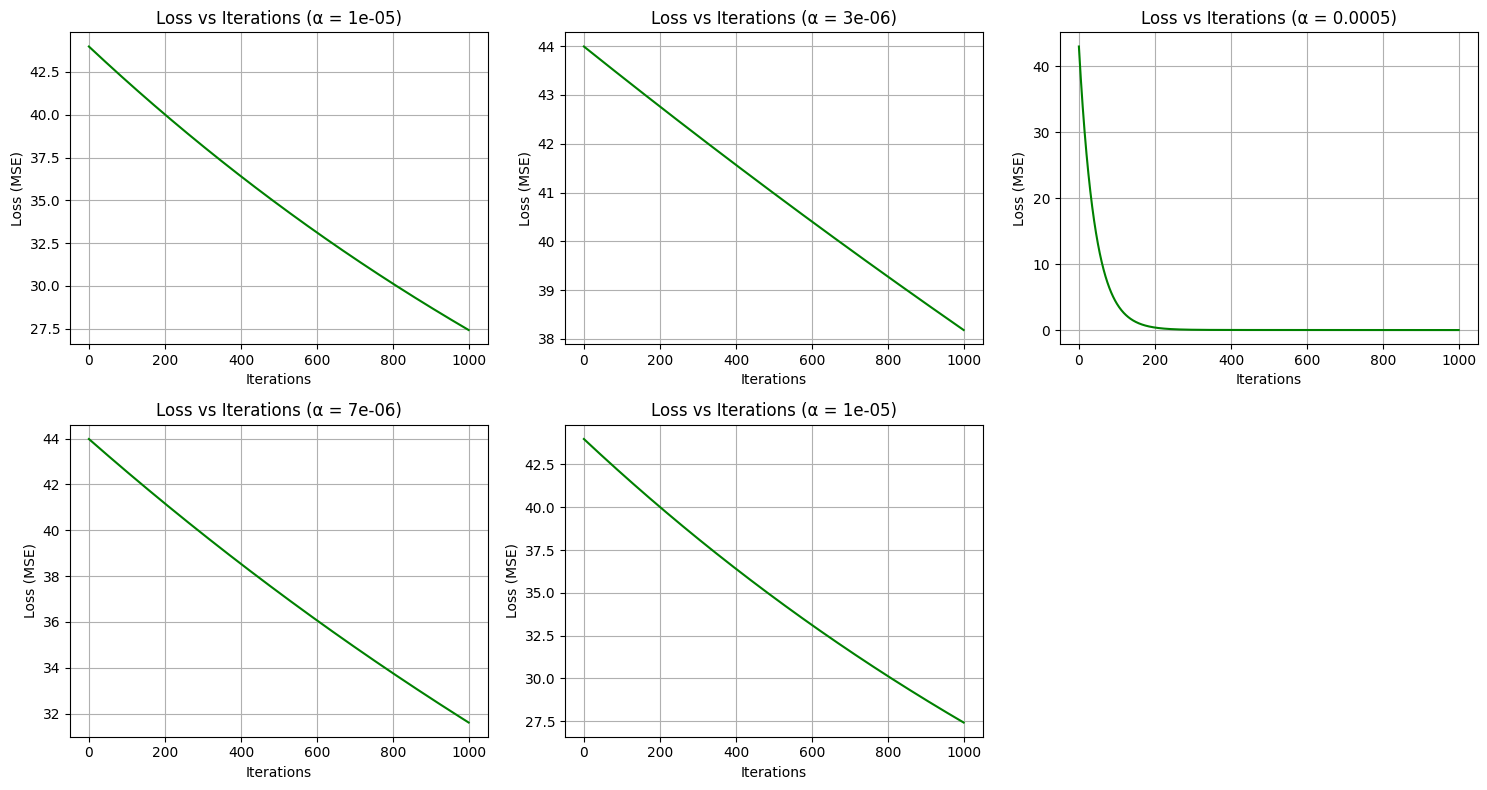

Learning rate 1e-05: Stopped due to max iterations.
Learning rate 3e-06: Stopped due to max iterations.
Learning rate 0.0005: Stopped due to max iterations.
Learning rate 7e-06: Stopped due to max iterations.
Learning rate 1e-05: Stopped due to max iterations.


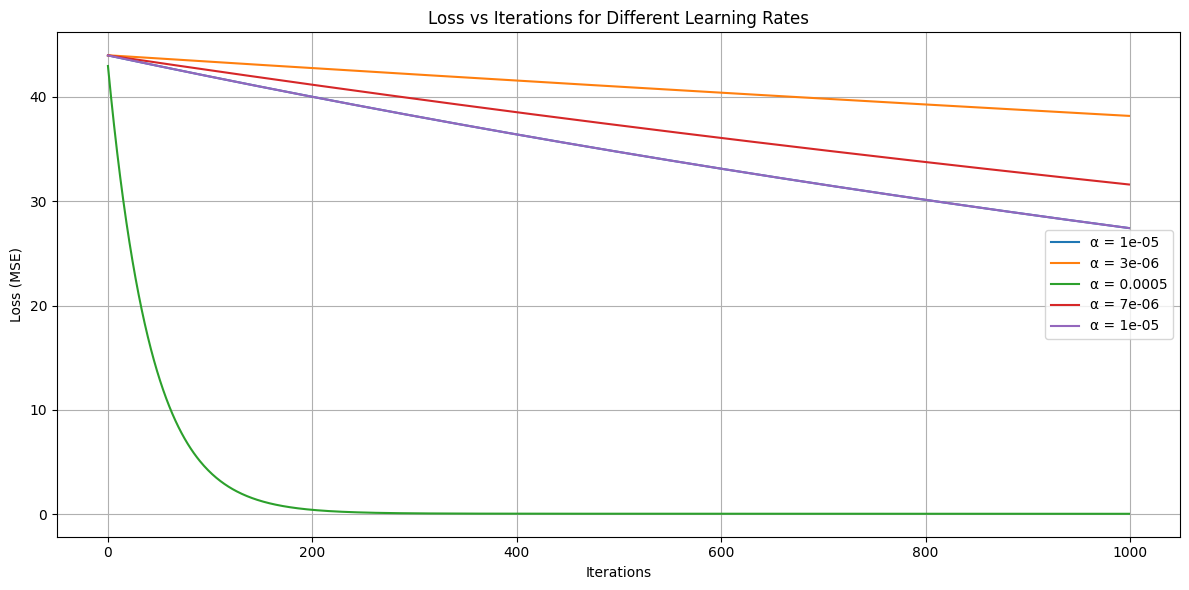

In [13]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

learning_rates = [0.00001, 0.000003, 0.0005, 0.000007, 0.00001]

# --- GRID OF LOSSES ---
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for idx, alpha in enumerate(learning_rates):
    m = 0
    b = 0
    n = len(x)
    threshold = 0.00001
    prev_loss = float('inf')
    max_iterations = 1000
    iteration = 0
    losses = []

    while True:
        dm = 0
        db = 0
        for i in range(n):
            y_pred = m * x[i] + b
            error = y_pred - y[i]
            dm += error * x[i]
            db += error

        dm = (2 / n) * dm
        db = (2 / n) * db

        m = m - alpha * dm
        b = b - alpha * db

        loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
        losses.append(loss)

        if abs(prev_loss - loss) < threshold:
            break

        prev_loss = loss
        iteration += 1
        if iteration >= max_iterations:
            print(f"Learning rate {alpha}: Stopped due to max iterations.")
            break

    # Plot each curve in its own grid cell
    axs[idx].plot(range(len(losses)), losses, color='green')
    axs[idx].set_title(f"Loss vs Iterations (α = {alpha})")
    axs[idx].set_xlabel("Iterations")
    axs[idx].set_ylabel("Loss (MSE)")
    axs[idx].grid(True)

    # Print result to console
    print(f"\nLearning Rate: {alpha}")
    print(f"Converged in {iteration} iterations")
    print(f"Final equation: price = {m:.2f} * area + {b:.2f}")

# Remove any unused subplots
if len(learning_rates) < len(axs):
    for j in range(len(learning_rates), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# --- Combined Loss Graph ---
plt.figure(figsize=(12, 6))
for alpha in learning_rates:
    m = 0
    b = 0
    n = len(x)
    threshold = 0.00001
    prev_loss = float('inf')
    max_iterations = 1000
    iteration = 0
    losses = []

    while True:
        dm = 0
        db = 0
        for i in range(n):
            y_pred = m * x[i] + b
            error = y_pred - y[i]
            dm += error * x[i]
            db += error

        dm = (2 / n) * dm
        db = (2 / n) * db

        m = m - alpha * dm
        b = b - alpha * db

        loss = sum((m * x[i] + b - y[i]) ** 2 for i in range(n)) / n
        losses.append(loss)

        if abs(prev_loss - loss) < threshold:
            break

        prev_loss = loss
        iteration += 1
        if iteration >= max_iterations:
            print(f"Learning rate {alpha}: Stopped due to max iterations.")
            break

    plt.plot(range(len(losses)), losses, label=f"α = {alpha}")

plt.title("Loss vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
